Problem:

For this particular problem, the data of rose wine sales in the 20th century is to be analysed. As an analyst in the ABC Estate Wines, We are tasked to analyse and forecast Wine Sales in the 20th century. The data is a time series data. Hence, We will be required to do time series forecasting and validating the model on through their respective RMSE score. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Rose.csv')

In [4]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
df.dtypes
#YearMonth is being considered as object but it is in date time format 

YearMonth     object
Rose         float64
dtype: object

In [6]:
df.info()  #looks like it has missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [2]:
df= pd.read_csv('Rose.csv', parse_dates=['YearMonth'], index_col='YearMonth')

In [8]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [9]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [10]:
df.dtypes

Rose    float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [12]:
round(df.describe(),3)

,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


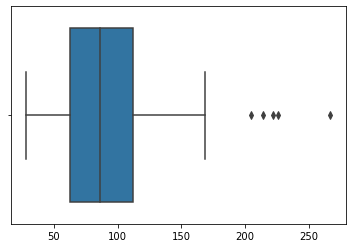

In [13]:
sns.boxplot(df)

#There are number of outliers present in the dataset
#very few outliers

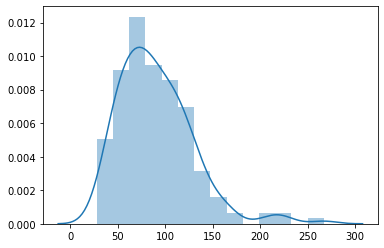

In [5]:
sns.distplot(df)

In [14]:
df.isnull().sum() #checking for null data 

Rose    2
dtype: int64

In [15]:
df.duplicated().sum() #checking for duplicated data

90

In [16]:
df[df.duplicated()==True] #having similar kind of sales

,Rose
YearMonth,
1980-07-01,118.0
1980-08-01,129.0
1981-02-01,129.0
1981-09-01,118.0
1982-04-01,97.0
...,...
1994-11-01,63.0
1995-01-01,30.0
1995-03-01,45.0


In [17]:
df.index.unique()

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

Observations: 
    
    1. Dataset has the observations from time period 1 january 1980 to 1 july 1995 about the 
       sale of sparkling wine.It has in total 187 entries
    2. There are two columns in the dataset, named YearMonth and Sparkling sales. 
    3. The data types for YearMonth is object while data type for Sparkling sales is 
       numeric (integer). We need to convert this YearMonth data type into datetime datatype. 
       Also we will keep this column as index for analysis of time series.  
    4. There are 2 null entries present in the dataset. 
    5. There are no duplicated entries present in the dataset.
    6. There are outliers present in the dataset. 
    
    

<Figure size 864x864 with 0 Axes>

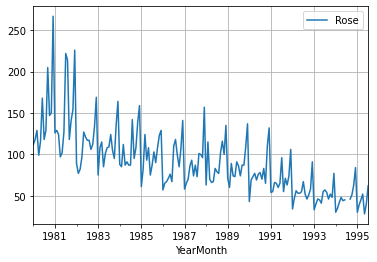

In [18]:
plt.figure(figsize=(12,12))
df.plot();
plt.grid();
#having trend and seasonality both

In [6]:
print('There are %1.1f entries in the dataset'%df.isnull().sum()) #null entries


There are 2.0 entries in the dataset


In [20]:
df['1994']

,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


In [21]:
df[df['Rose'].isnull()==True]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


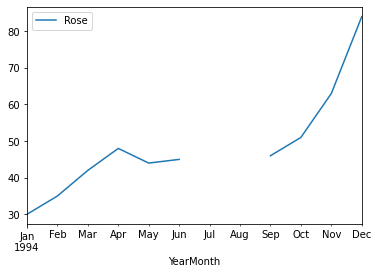

In [22]:
df['1994'].plot(); #truncated view of missing data

In [7]:
df.fillna(value=df.interpolate(method='polynomial', order=3), inplace=True)
# print(df['1994'])
#The dataset has trend and seasonality both in the data. 

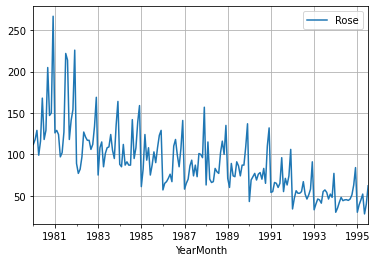

In [8]:
df.plot()
plt.grid();

In [24]:
df['1994']  #values at order 3 and order 5 comes out to be same 

,Rose
YearMonth,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,45.191702
1994-08-01,44.343965
1994-09-01,46.000000


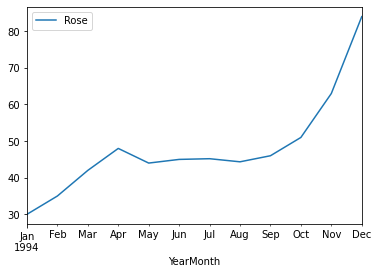

In [25]:
df['1994'].plot(); #truncated view

Since there is seasonality present in the data so we would prefer taking an avergae of the seasonality of previous year and next year to impute the mission value in the data. 

### A year on year boxplot for the wine sales.

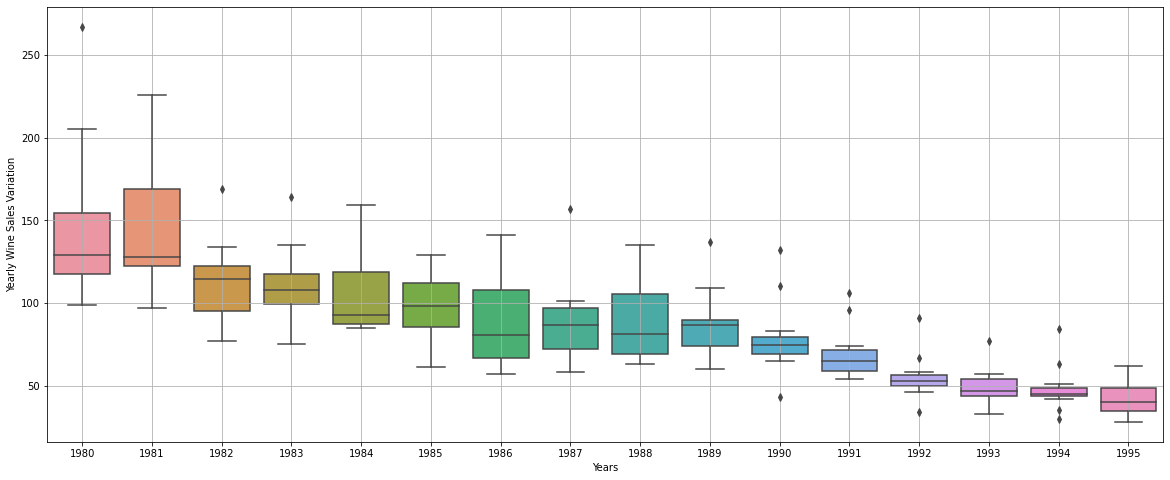

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(df.index.year, df['Rose'], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

In [27]:
df.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='YearMonth', length=187)

In [28]:
df['Rose'].median()

85.0

In [29]:
print('Year: 1980', df['1980'].median())
print('Year: 1981', df['1981'].median())
print('Year: 1982', df['1982'].median())
print('Year: 1983', df['1983'].median())
print('Year: 1984', df['1984'].median())
print('Year: 1985', df['1985'].median())
print('Year: 1986', df['1986'].median())
print('Year: 1987', df['1987'].median())
print('Year: 1988', df['1988'].median())
print('Year: 1989', df['1989'].median())
print('Year: 1990', df['1990'].median())
print('Year: 1991', df['1991'].median())
print('Year: 1992', df['1992'].median())
print('Year: 1993', df['1993'].median())
print('Year: 1994', df['1994'].median())
print('Year: 1995', df['1995'].median())


Year: 1980 Rose    129.0
dtype: float64
Year: 1981 Rose    128.0
dtype: float64
Year: 1982 Rose    114.5
dtype: float64
Year: 1983 Rose    108.0
dtype: float64
Year: 1984 Rose    93.0
dtype: float64
Year: 1985 Rose    98.0
dtype: float64
Year: 1986 Rose    80.5
dtype: float64
Year: 1987 Rose    86.5
dtype: float64
Year: 1988 Rose    81.0
dtype: float64
Year: 1989 Rose    86.5
dtype: float64
Year: 1990 Rose    74.5
dtype: float64
Year: 1991 Rose    65.0
dtype: float64
Year: 1992 Rose    53.0
dtype: float64
Year: 1993 Rose    47.0
dtype: float64
Year: 1994 Rose    45.095851
dtype: float64
Year: 1995 Rose    40.0
dtype: float64


### A monthly boxplot for the wine sales taking  months of given years into account

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

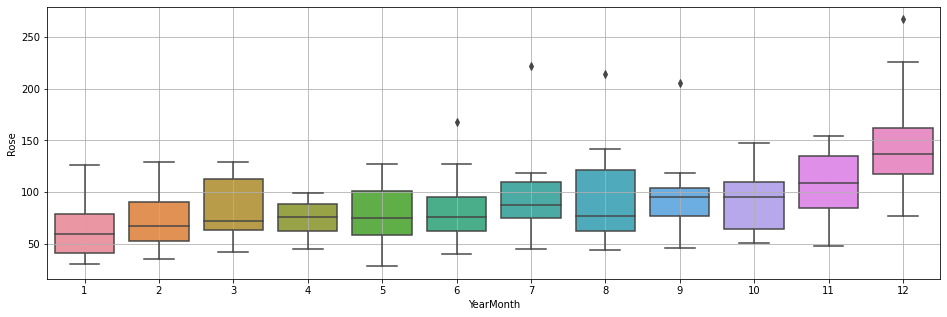

In [30]:
fig, ax = plt.subplots(figsize=(16,5))
sns.boxplot(df.index.month, df['Rose'], ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years does show few outliers.

The maximum sales comes at the month of  September, October, November and December

### A monthly time series plot for wine sales taking months of given years into account

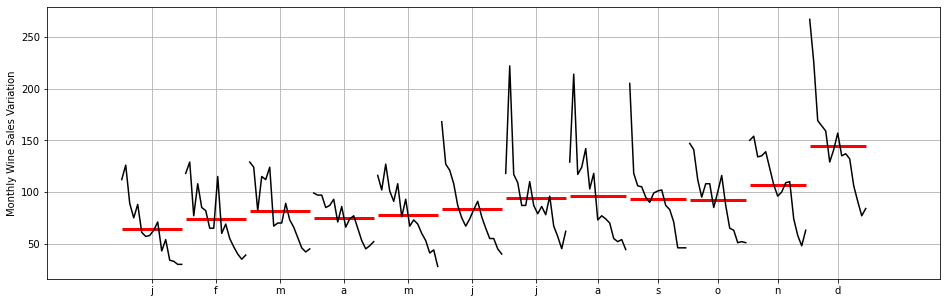

In [31]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(16,5))
month_plot(df,ylabel='Monthly Wine Sales Variation',ax=ax)
plt.grid();

### 1. Decomposition of the time series plot of data

#### Additive Model

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

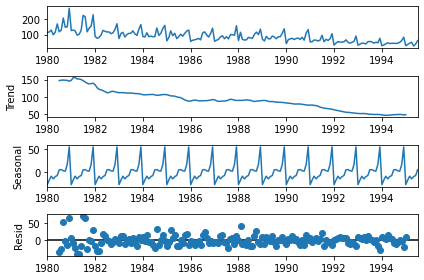

In [33]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

The error here is more or less following the same trend as the seasonality. It does not seem to be very random. 


Let's look at the multiplicative model.

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [35]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.900426
1980-02-01   -17.430766
1980-03-01    -9.277028
1980-04-01   -15.089528
1980-05-01   -10.187742
1980-06-01    -7.669885
1980-07-01     4.895687
1980-08-01     5.419727
1980-09-01     2.782907
1980-10-01     1.880129
1980-11-01    16.855129
1980-12-01    55.721796
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.979020
1980-08-01   -24.544727
1980-09-01    53.842093
1980-10-01    -2.963463
1980-11-01   -14.271796
1980-12-01    66.15320

In [36]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    113.104313
1980-08-01    123.580273
1980-09-01    202.217093
1980-10-01    145.119871
1980-11-01    133.144871
1980-12-01    211.278204
dtype: float64

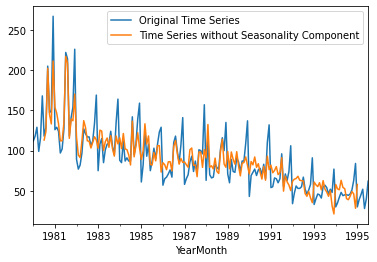

In [37]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

#### Multiplicative Model

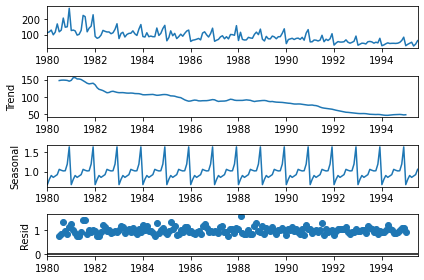

In [38]:
decomposition1 = seasonal_decompose(df,model='multiplicative')
decomposition1.plot();

In [39]:
trend_mul = decomposition1.trend
seasonality_mul = decomposition1.seasonal
residual_mul = decomposition1.resid

In [40]:
print('Trend','\n',trend_mul.head(12),'\n')
print('Seasonality','\n',seasonality_mul.head(12),'\n')
print('Residual','\n',residual_mul.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670215
1980-02-01    0.806237
1980-03-01    0.901331
1980-04-01    0.854216
1980-05-01    0.889586
1980-06-01    0.924154
1980-07-01    1.057997
1980-08-01    1.034210
1980-09-01    1.017803
1980-10-01    1.022743
1980-11-01    1.192563
1980-12-01    1.628943
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758288
1980-08-01    0.842079
1980-09-01    1.357467
1980-10-01    0.970609
1980-11-01    0.853224
1980-12-01    1.129440
Name: resid, dtype: fl

### 2. Splitting the data for model building 

Observing from above going ahead with multiplicative model would be a right choice. Residuals does not seem gto be following any pattern in this case.

In [41]:
train = df[df.index.year<1991]
test = df[df.index.year>=1991]

In [42]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [43]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



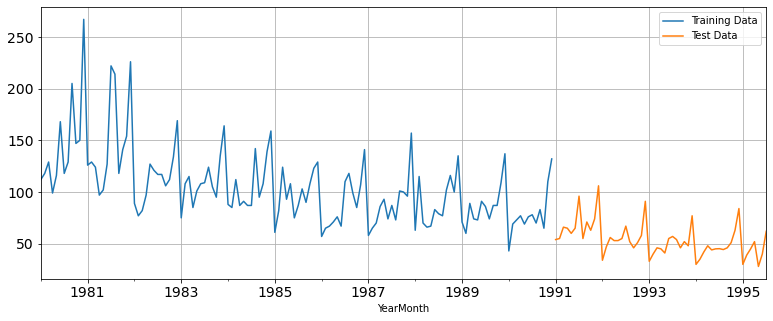

In [44]:
#plotting the test and train
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Here we have data till 1991 as train dataset while from 1991 to 1995 the data belongs to test dataset. 

We will train our model till the data 1991 and we will test our model on the test and check the model's validity.

### 3. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 

While checking the performance and comparison, We will be building other additional models such as regression, naïve forecast models, simple average models, moving average models should on the training data and check the performance on the test data using RMSE.

### Model 1 : Linear Regression 

#### For this particular linear regression, we are going to regress the 'Sparkling' sales variable against the order of the occurrence (YearMonth) . For this we need to modify our training data before fitting it into a linear regression.

In [45]:
print(train.shape)
print(test.shape)
print(df.shape)

(132, 1)
(55, 1)
(187, 1)


In [46]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [47]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [48]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [49]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

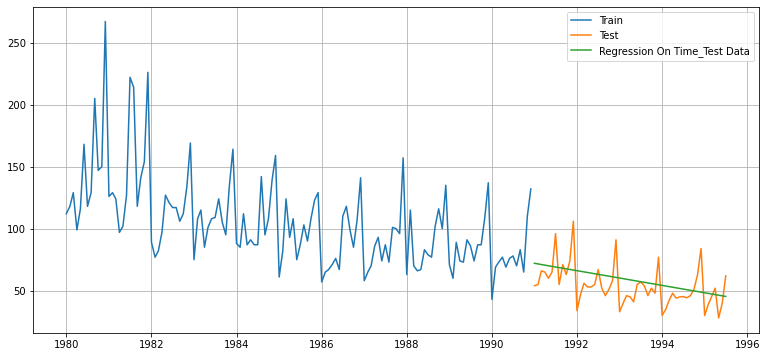

In [53]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [54]:
from sklearn import metrics

In [55]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.279


In [56]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.279105


### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$  

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today. It is naive in this understanding.

In [57]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [59]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

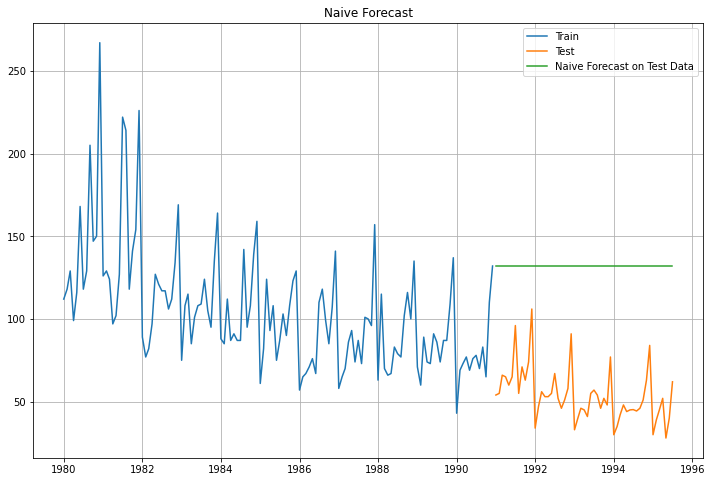

In [60]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [62]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.748


In [63]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814


Till Here, Linear Regression performs better than Naive model. 

### Model 3 : Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [64]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [65]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


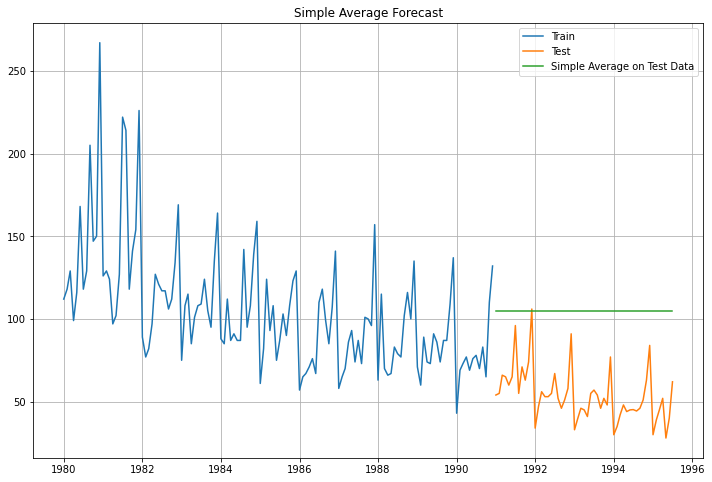

In [66]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
#### Model Evaluation

In [67]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.490


In [68]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397


### Model 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [69]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [71]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


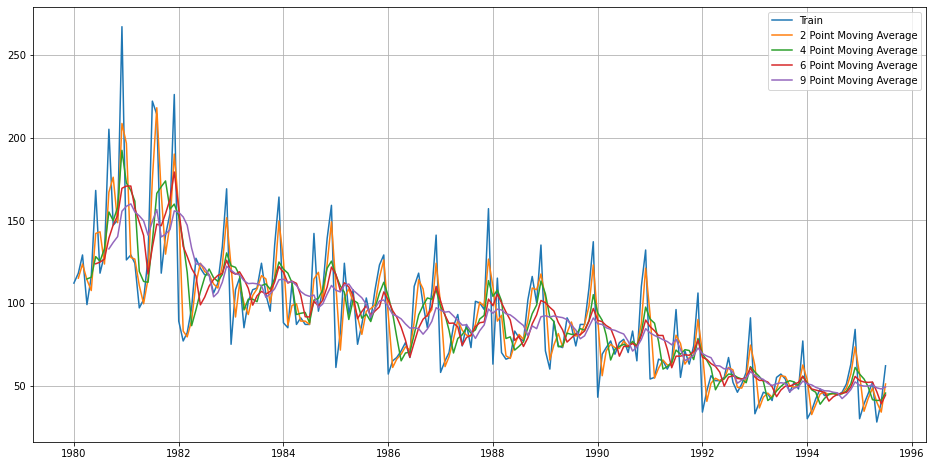

In [72]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [73]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

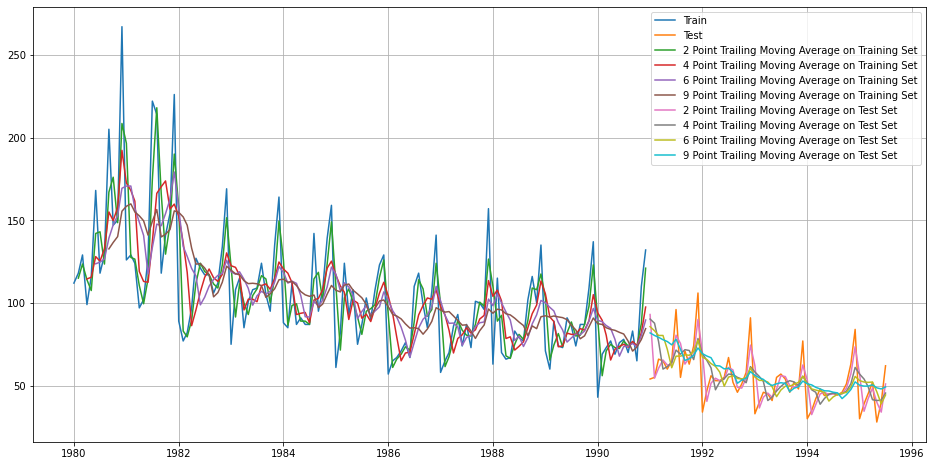

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [75]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %2.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data, RMSE is %2.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data, RMSE is %2.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data, RMSE is %2.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data, RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data, RMSE is 14.458
For 6 point Moving Average Model forecast on the Training Data, RMSE is 14.574
For 9 point Moving Average Model forecast on the Training Data, RMSE is 14.733 


In [76]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243


### Model 5: Simple Exponential Smoothing

In [77]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [78]:
SES_train = train.copy()
SES_test = test.copy()

In [79]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [80]:
model_SES_autofit = model_SES.fit(optimized=True)

In [81]:
model_SES_autofit.params

{'smoothing_level': 0.09874997205700975,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.3867859443936,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.105001
1991-02-01,55.0,87.105001
1991-03-01,66.0,87.105001
1991-04-01,65.0,87.105001
1991-05-01,60.0,87.105001


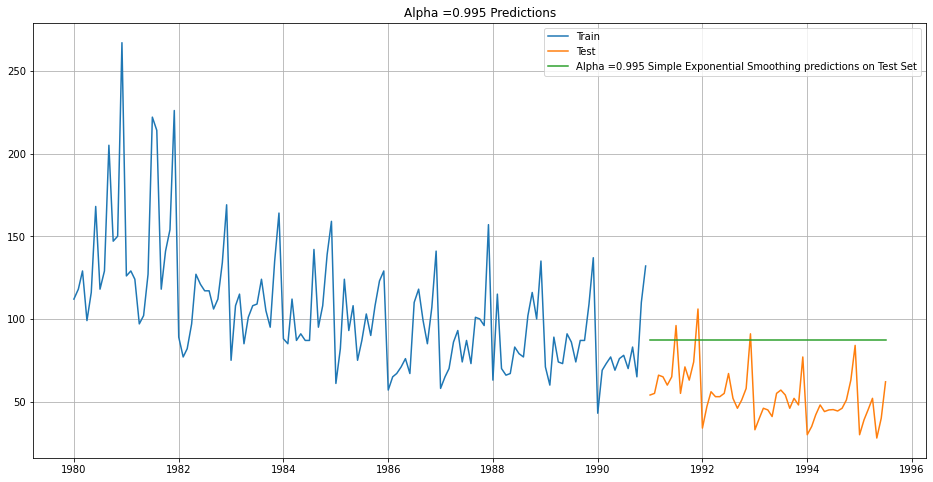

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

#### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [84]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.827


In [85]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [86]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [87]:
test

,Rose
YearMonth,
1991-01-01,54.000000
1991-02-01,55.000000
1991-03-01,66.000000
1991-04-01,65.000000
1991-05-01,60.000000
1991-06-01,65.000000
1991-07-01,96.000000
1991-08-01,55.000000
1991-09-01,71.000000


In [ ]:
# model_SES_alpha_i.forecast(steps=55)

In [88]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [89]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.470164,47.534874
1,0.4,33.035130,53.797222
2,0.5,33.682839,59.671395
3,0.6,34.441171,65.000726
4,0.7,35.323261,69.727462
5,0.8,36.334596,73.803181
6,0.9,37.482782,77.168379


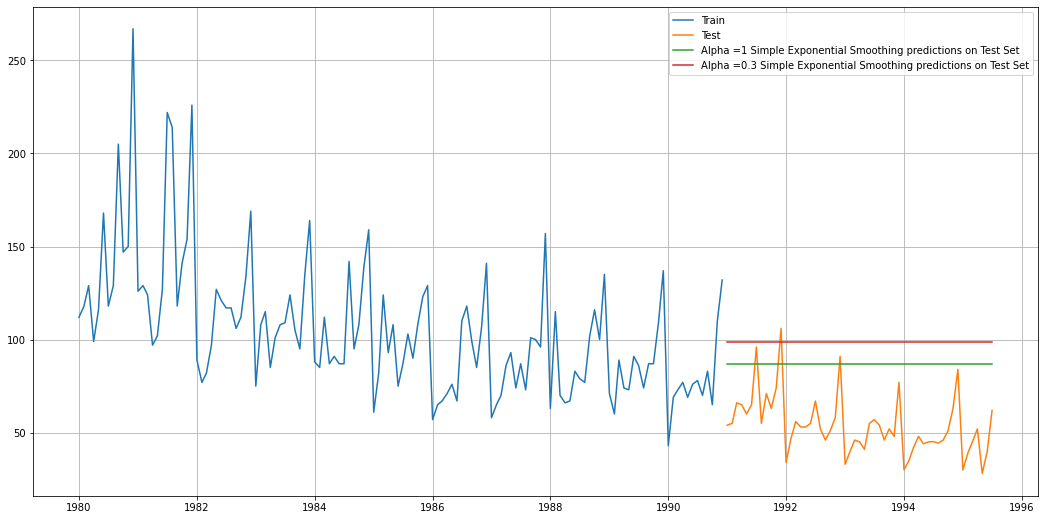

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [91]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874


### Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [92]:
DES_train = train.copy()
DES_test = test.copy()

In [93]:
model_DES = Holt(DES_train['Rose'])

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [94]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [95]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [96]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.603407
1,0.3,0.4,37.393239,358.786889
2,0.3,0.5,38.888325,451.846241
3,0.3,0.6,40.280670,536.990190
4,0.3,0.7,41.403518,601.652401
...,...,...,...,...
59,1.0,0.6,51.831610,801.716162
60,1.0,0.7,54.497039,841.928536
61,1.0,0.8,57.365879,854.001506
62,1.0,0.9,60.474309,834.746895


Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [97]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.603407
8,0.4,0.3,36.749123,339.342327
1,0.3,0.4,37.393239,358.786889
16,0.5,0.3,37.433314,394.308405
24,0.6,0.3,38.348984,439.331797


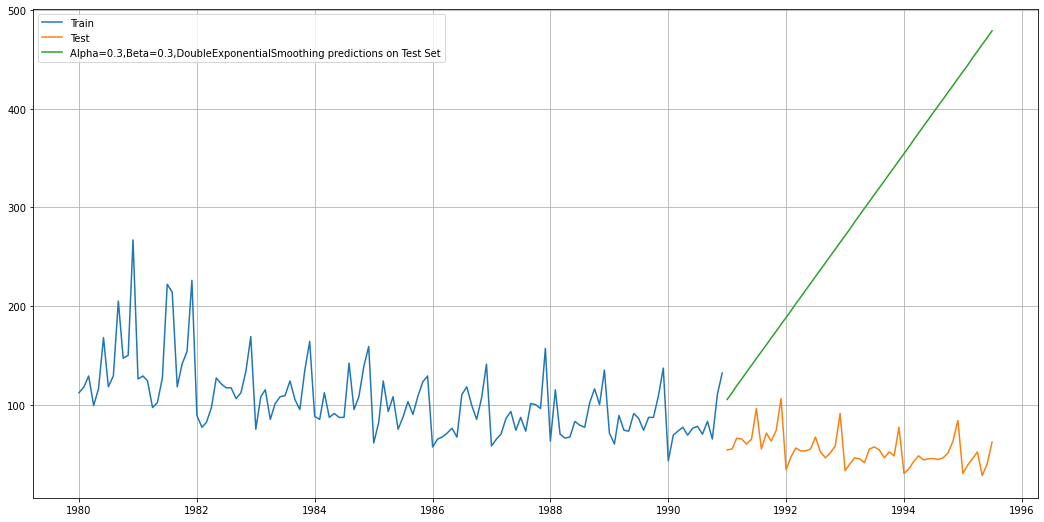

In [98]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [99]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.603407


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [100]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
train

In [101]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [111]:
model_TES1 = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
model_TES.seasonal_periods

12

In [103]:
model_TES_autofit = model_TES.fit()

In [116]:
model_TES1_autofit = model_TES1.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [104]:
model_TES_autofit.params

{'smoothing_level': 0.10609625889897807,
 'smoothing_slope': 0.04843854924060428,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565156766287,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927163, 1.80572657, 1.58888844, 1.77822725,
        1.92604397, 2.11649487, 2.25135227, 2.11690616, 2.08112861,
        2.40927315, 3.30448176]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [105]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.674338
1991-02-01,55.0,63.471275
1991-03-01,66.0,68.788790
1991-04-01,65.0,60.277828
1991-05-01,60.0,67.180379


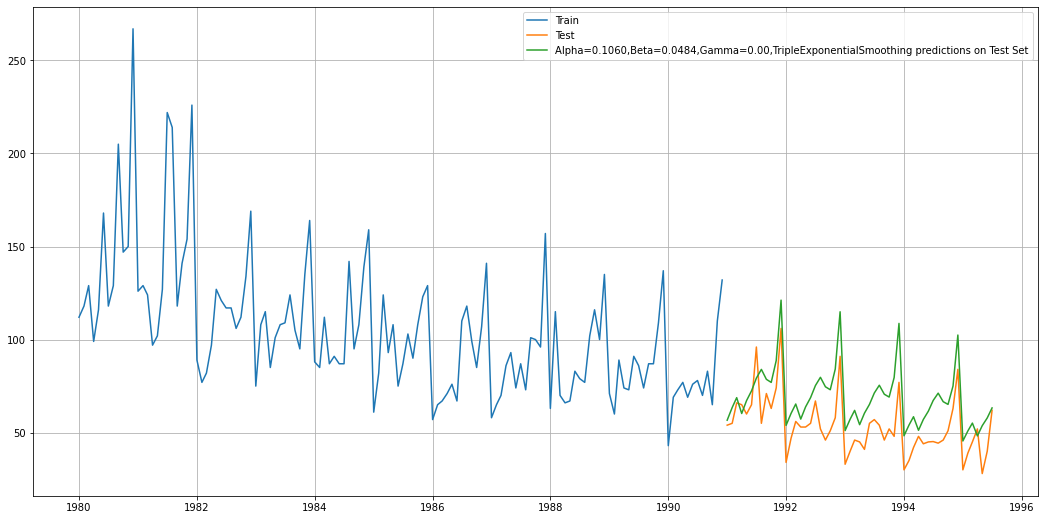

In [118]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1060,Beta=0.0484,Gamma=0.00,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [109]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.1060,Beta=0.0484,Gamma=0.00, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.1060,Beta=0.0484,Gamma=0.00, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.409


For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 45617.969

In [119]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1060,Beta=0.0484,Gamma=0.00,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.603407


In [120]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [122]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [123]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,27.217969,19.081750
1,0.3,0.3,0.4,27.399095,11.177214
2,0.3,0.3,0.5,27.928512,30.531812
3,0.3,0.3,0.6,28.888611,63.591240
4,0.3,0.3,0.7,30.568635,122.443493
...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,9603.644010
508,1.0,1.0,0.7,30724.126331,23029.955502
509,1.0,1.0,0.8,1218.755446,9626.709109
510,1.0,1.0,0.9,14150.253251,9691.904446


In [124]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
8,0.3,0.4,0.3,28.111886,10.953226
1,0.3,0.3,0.4,27.399095,11.177214
69,0.4,0.3,0.8,32.601491,12.610031
16,0.3,0.5,0.3,29.087520,14.387171
131,0.5,0.3,0.6,32.144773,16.695798


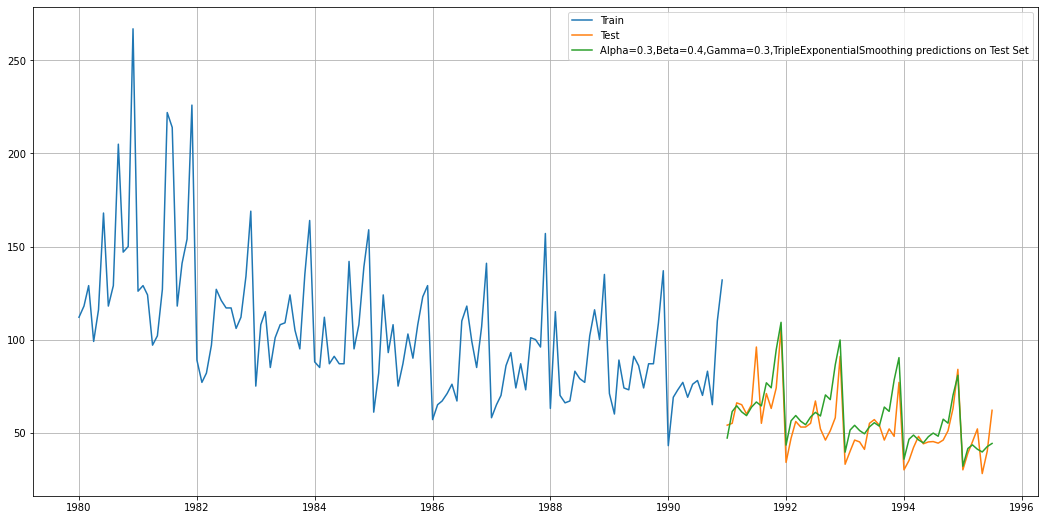

In [125]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [126]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.603407


In [127]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",10.953226
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
RegressionOnTime,15.279105
"Alpha=0.1060,Beta=0.0484,Gamma=0.00,TripleExponentialSmoothing",17.408988
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
SimpleAverageModel,53.490397


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.3, $\beta$ = 0.4 and $\gamma$ = 0.3.

In [ ]:
# Plotting on both the Training and Test data
plt.figure(figsize=(18,9))

## Plotting on both the Training and Test using autofit
plt.plot(train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1542,Beta=1.3071,Gamma=0.3713,TripleExponentialSmoothing predictions on Test Set')

## Plotting on both the Training and Test data

# plt.plot(train['Sparkling'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();


## Plotting on both the Training and Test data

# plt.figure(figsize=(16,8))
# plt.plot(train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
# plt.title('Alpha =0.995 Predictions');


plt.tight_layout()


# plt.plot(SES_train['Sparkling'], label='Train')
# plt.plot(test['Sparkling'], label='Test')

# plt.plot(SES_test['predict',0.995], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

# plt.plot(DES_test['predict',0.3,0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

# plt.plot(TES_test['predict',0.15,1.30,0.37], label='Alpha=0.15,Beta=1.30,Gamma=0.37,TripleExponentialSmoothing predictions on Test Set')

# plt.legend(loc='best')
# plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The two models to be built on the whole data are the following:

* Alpha=0.1060,Beta=0.0484,Gamma=0.00,TripleExponentialSmoothing
* Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing	

In [128]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1060,
                                                                 smoothing_slope=0.0484,
                                                                 smoothing_seasonal=0.00)

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [129]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 16.3050950645033


In [130]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

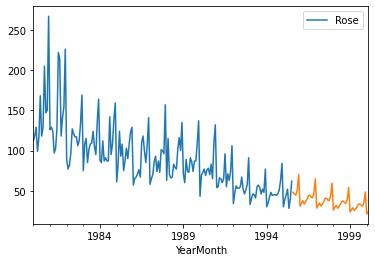

In [131]:
df.plot()
prediction_1.plot();

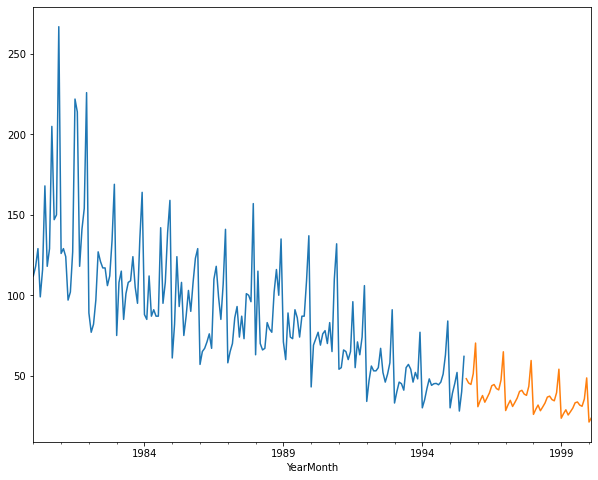

In [133]:
plt.figure(figsize=(10,8))
# plt.subplot(2,1,1)
df['Rose'].plot()
# plt.subplot(2,1,2)
prediction_1.plot()
# plt.ylim()

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [134]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,16.087720,48.127299,80.166877
1995-09-01,13.415634,45.455213,77.494791
1995-10-01,12.505754,44.545332,76.584911
1995-11-01,19.196420,51.235999,83.275577
1995-12-01,38.240876,70.280454,102.320033


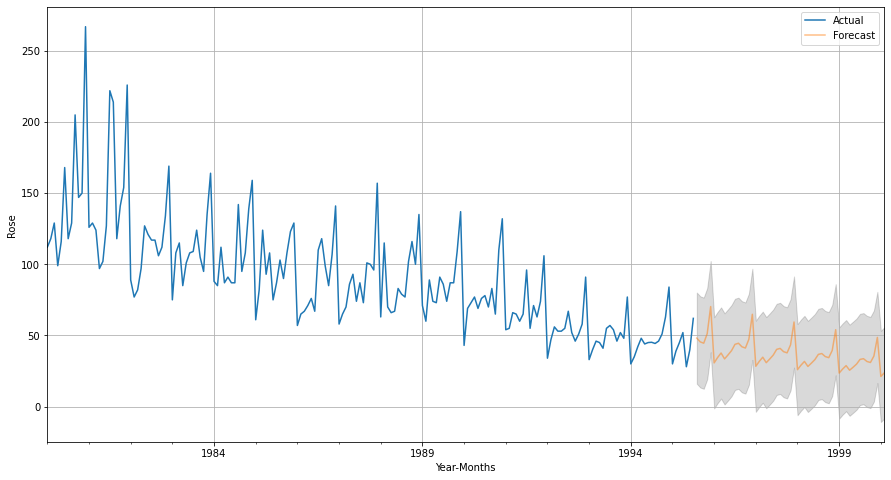

In [135]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

### Forecasting on the entire dataset

In [136]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [137]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)


RMSE: 24.264960710396622


In [138]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

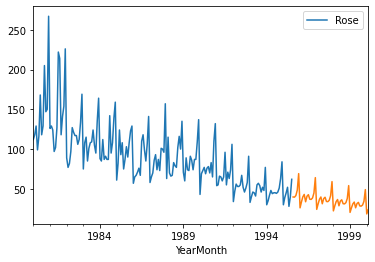

In [139]:
df.plot()
prediction_2.plot();

In [140]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,7.769217,39.808796,71.848374
1995-09-01,7.511462,39.551041,71.590619
1995-10-01,9.574134,41.613712,73.653291
1995-11-01,16.348841,48.388420,80.427998
1995-12-01,37.101712,69.141290,101.180869


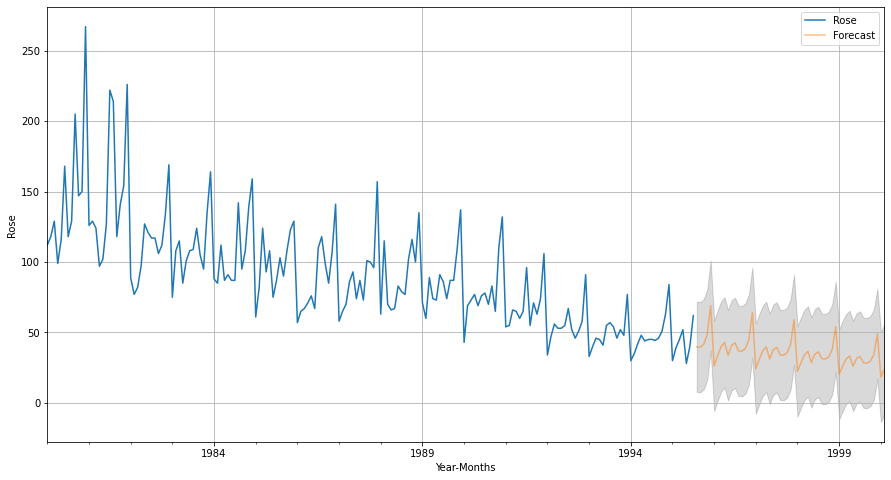

In [141]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [206]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


###### Note: Please do go ahead and build the remaining models on the full data and check how the confidence bands around the prediction look. 

### 4. Checking for the stationarity of the data on which the model is being built using appropriate statistical tests and also mention the hypothesis for the statistical test.
Stationarity is being checked at alpha = 0.05.

In [142]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

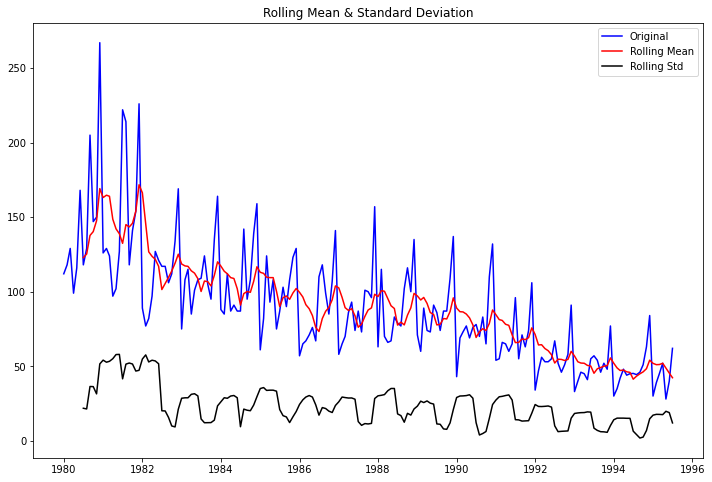

Results of Dickey-Fuller Test:
Test Statistic                  -1.872862
p-value                          0.344933
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [143]:
plt.figure(figsize=(12,8))
test_stationarity(df['Rose'])

The p-value is high hence the null hypothesis would be accepted meaning that the data is non stationary. 

We see that at 5% significant level the Time Series is non-stationary.

#Making it stationary 
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

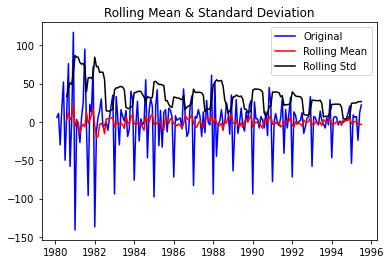

Results of Dickey-Fuller Test:
Test Statistic                -8.044041e+00
p-value                        1.814617e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [144]:
test_stationarity(df['Rose'].diff().dropna())

In [145]:
1.814617e-12 <0.05

True

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [146]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

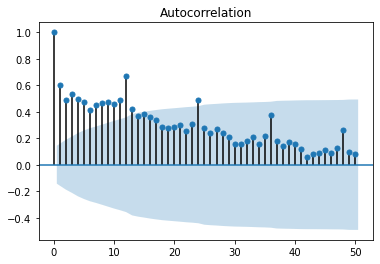

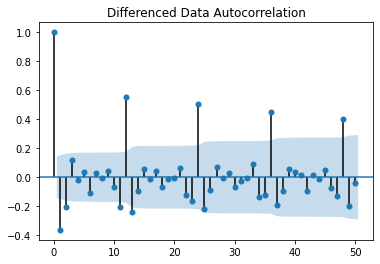

In [147]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()   #q=2

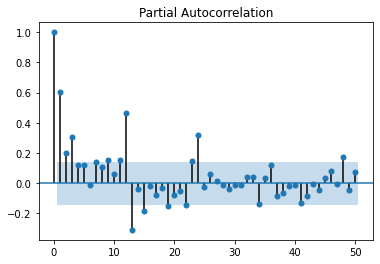

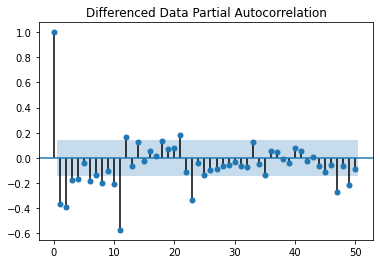

In [148]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show() #p=3 or 4 #d=1

### 5.Building an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluating this model on the test data using RMSE.

In [149]:
train.shape

(132, 1)

In [150]:
test.shape

(55, 1)

In [151]:
## This is to display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [152]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p=q= range(0, 4)
# q=range(0,)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [153]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [154]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464154
ARIMA(0, 1, 2) - AIC:1276.8353756081547
ARIMA(0, 1, 3) - AIC:1278.0742554161807
ARIMA(1, 1, 0) - AIC:1319.3483105801863
ARIMA(1, 1, 1) - AIC:1277.7757471643506
ARIMA(1, 1, 2) - AIC:1277.3592303514042
ARIMA(1, 1, 3) - AIC:1279.312636552107
ARIMA(2, 1, 0) - AIC:1300.6092611744193
ARIMA(2, 1, 1) - AIC:1279.04568940933


C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 2) - AIC:1279.2986939364896


C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 3) - AIC:1281.196226042522
ARIMA(3, 1, 0) - AIC:1299.4787391542977
ARIMA(3, 1, 1) - AIC:1279.6059616243922
ARIMA(3, 1, 2) - AIC:1280.9692523556287
ARIMA(3, 1, 3) - AIC:1273.1940950598832


C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [155]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
15,"(3, 1, 3)",1273.194095
2,"(0, 1, 2)",1276.835376
6,"(1, 1, 2)",1277.359230
5,"(1, 1, 1)",1277.775747
3,"(0, 1, 3)",1278.074255
9,"(2, 1, 1)",1279.045689
10,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312637
13,"(3, 1, 1)",1279.605962
1,"(0, 1, 1)",1280.726183


In [157]:
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sat, 16 Apr 2022   AIC                           1273.194
Time:                        22:32:03   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.409      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.34

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [159]:
#Observed 
auto_ARIMA_observed = ARIMA(train['Rose'], order=(3,1,2))

results_auto_ARIMA_observed = auto_ARIMA_observed.fit()

print(results_auto_ARIMA_observed.summary())

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.950
Date:                Sat, 16 Apr 2022   AIC                           1280.969
Time:                        22:32:47   BIC                           1301.096
Sample:                    02-01-1980   HQIC                          1289.148
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.656      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.284      -1.007       0.295
ar.L2.D.Rose     0.0279      0.120      0.23

all are significant

### Predict on the Test Set using this model and evaluate the model.

In [160]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [161]:
predicted_auto_ARIMA_observed = results_auto_ARIMA_observed.forecast(steps=len(test))

In [162]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.995757526247912


In [163]:
from sklearn.metrics import  mean_squared_error
rmse_observed = mean_squared_error(test['Rose'],predicted_auto_ARIMA_observed[0],squared=False)
print(rmse_observed)

resultsDf_ARIMA_observed= pd.DataFrame({'Test RMSE': [rmse_observed]}
                           ,index=['ARIMA(3,1,2)'])

resultsDf_ARIMA_observed

15.532542618317303


,Test RMSE
"ARIMA(3,1,2)",15.532543


In [164]:
resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3)'])

resultsDf_ARIMA

,Test RMSE
"ARIMA(3,1,3)",15.995758


In [166]:
# resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE'])}
#                            ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_ARIMA])
# resultsDf.drop('SARIMA(1,1,2)(1,1,2,6)', axis=0, inplace=True)

# resultsDf.fillna(1374.375791, inplace=True)

# resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE'])}
#                            ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_ARIMA_observed])
# resultsDf.drop('ARIMA(2,1,1)', axis=0, inplace=True)
# resultsDf.fillna(1374.375791, inplace=True)


# resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE'])}
#                            ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_ARIMA])
# resultsDf.drop('SARIMA(2,1,2)(1,1,2,6)', axis=0, inplace=True)

# resultsDf.fillna(1374.375791, inplace=True)

# resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE'])}
#                            ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_ARIMA_observed])
# resultsDf.drop('ARIMA(2,1,1)', axis=0, inplace=True)
# resultsDf.fillna(1374.375791, inplace=True)

In [167]:
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.603407


### 5. Building ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

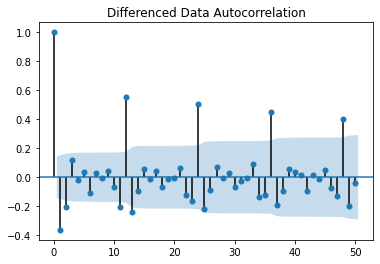

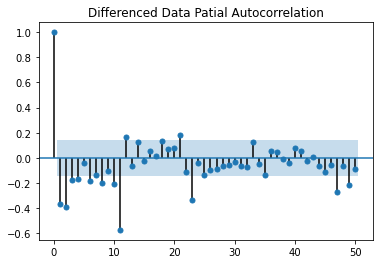

In [168]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

#p=4
#q=2
#d=1

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

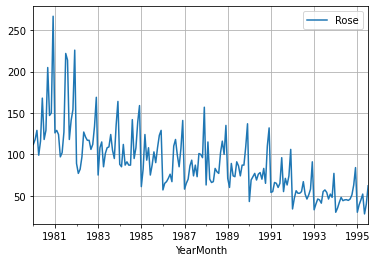

In [169]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

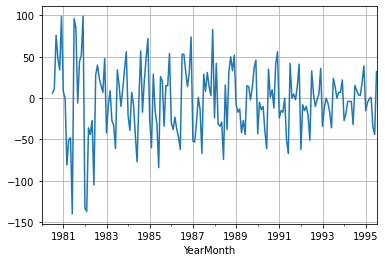

In [173]:
(df['Rose'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

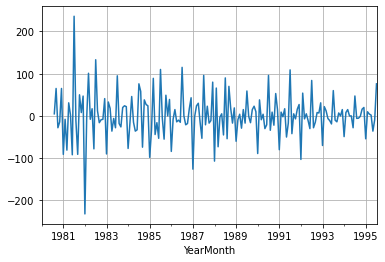

In [174]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

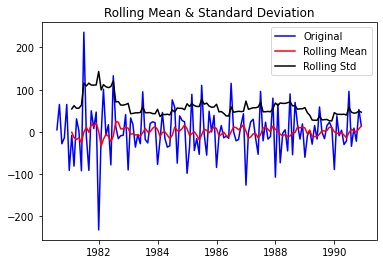

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [176]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


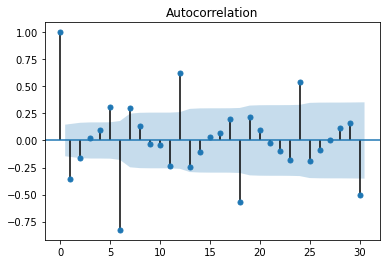

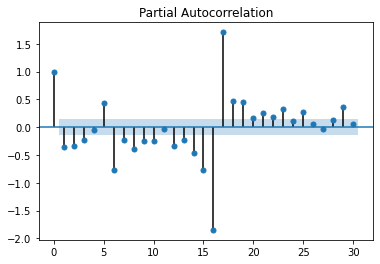

In [177]:
plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(3) and q(3) parameters same as the ARIMA model. d=1
We will keep the p(3) and q(2) parameters same as the ARIMA model. d=1


* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do directly cut-off to 0.

while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 


In [179]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [1, 2], 6)   Log Likelihood                -437.853
Date:                                Sat, 16 Apr 2022   AIC                            899.706
Time:                                        22:43:35   BIC                            931.439
Sample:                                             0   HQIC                           912.562
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9799      0.163      6.016      0.000       0.661       1.299
ar.

<Figure size 720x720 with 0 Axes>

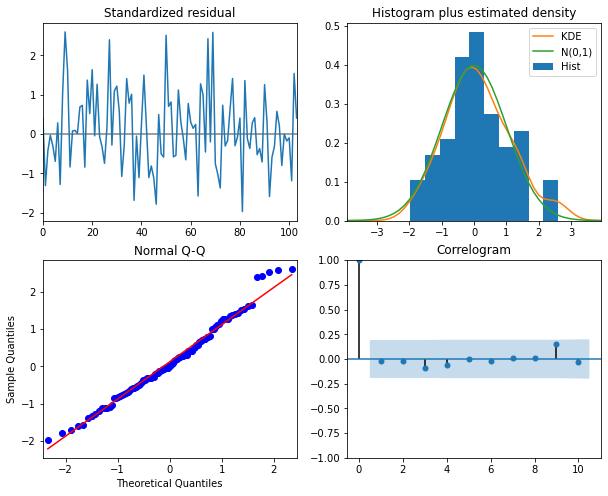

In [180]:
plt.figure(figsize=(10,10))
results_manual_SARIMA_6.plot_diagnostics(figsize=(10,8))
plt.show();

In [195]:
import statsmodels.api as sm

manual_SARIMA_5 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_5 = manual_SARIMA_5.fit(maxiter=1000)
print(results_manual_SARIMA_5.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -444.189
Date:                           Sat, 16 Apr 2022   AIC                            910.378
Time:                                   22:50:08   BIC                            939.466
Sample:                                        0   HQIC                           922.162
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7726      0.141     -5.493      0.000      -1.048      -0.497
ar.L2          0.0500      0.173      0.288

<Figure size 720x720 with 0 Axes>

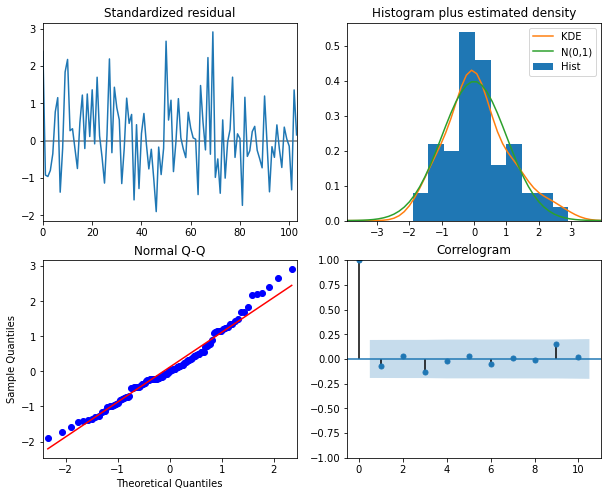

In [196]:
plt.figure(figsize=(10,10))
results_manual_SARIMA_5.plot_diagnostics(figsize=(10,8))
plt.show();

In [201]:
#Where f=12
import statsmodels.api as sm

manual_SARIMA_4 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_4 = manual_SARIMA_4.fit(maxiter=1000)
print(results_manual_SARIMA_4.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -328.983
Date:                                 Sat, 16 Apr 2022   AIC                            681.966
Time:                                         22:52:56   BIC                            710.550
Sample:                                              0   HQIC                           693.426
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7790      0.176    -10.126      0.000      -2.123      -1

<Figure size 720x720 with 0 Axes>

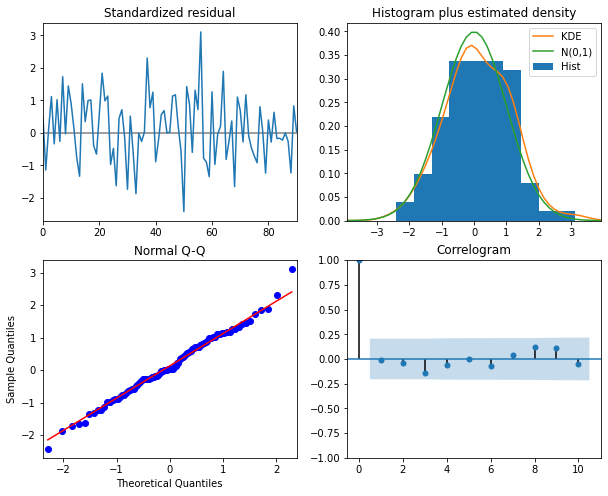

In [184]:
plt.figure(figsize=(10,10))
results_manual_SARIMA_4.plot_diagnostics(figsize=(10,8))
plt.show();

#### Predict on the Test Set using this model and evaluate the model.

In [185]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [197]:
predicted_manual_SARIMA_5 = results_manual_SARIMA_5.get_forecast(steps=len(test))

In [202]:
predicted_manual_SARIMA_4 = results_manual_SARIMA_4.get_forecast(steps=len(test))

In [187]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,57.708676,15.788748,26.763300,88.654053
1,66.973647,16.134759,35.350101,98.597194
2,77.146070,16.415533,44.972217,109.319923
3,72.031608,16.825746,39.053752,105.009464
4,66.817266,17.087201,33.326967,100.307566


In [198]:
predicted_manual_SARIMA_5.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,50.127067,17.065424,16.679451,83.574683
1,61.106764,17.996364,25.834538,96.378990
2,72.846099,18.000521,37.565725,108.126472
3,72.597595,18.178503,36.968383,108.226807
4,69.221120,18.244459,33.462638,104.979601


In [203]:
predicted_manual_SARIMA_4.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,47.721320,13.879316,20.518360,74.924281
1,59.505259,14.039391,31.988557,87.021960
2,67.678229,14.043056,40.154346,95.202113
3,64.672945,14.053612,37.128372,92.217517
4,65.385324,14.050779,37.846304,92.924345


In [189]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

20.30668778383208


In [199]:
rmse1 = mean_squared_error(test['Rose'],predicted_manual_SARIMA_5.predicted_mean,squared=False)
print(rmse1)

18.045032759381947


In [204]:
rmse2 = mean_squared_error(test['Rose'],predicted_manual_SARIMA_4.predicted_mean,squared=False)
print(rmse2)

17.24941926302926


In [191]:
temp_resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,3)(3,1,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_6])

resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.603407



### 6.Building a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [205]:
temp_resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse2]}
                           ,index=['SARIMA(3,1,3)(3,1,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.279105
NaiveModel,79.747814
SimpleAverageModel,53.490397
2pointTrailingMovingAverage,11.529901
4pointTrailingMovingAverage,14.458344
6pointTrailingMovingAverage,14.573943
9pointTrailingMovingAverage,14.733243
"Alpha=0.995,SimpleExponentialSmoothing",36.826675
"Alpha=0.3,SimpleExponentialSmoothing",47.534874
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.603407


In [ ]:
#lower the RMSE better the model 
#Hence, Alpha = 0.3, Beta = 0.4 and Gamma=0.3 Triple Exponential Smoothing model 
# is performing better than any other given model.

### 7. Building the most optimum model on the complete data and predicting 12 months into the future with appropriate confidence intervals/bands.

#### Building the most optimum model on the Full Data.

In [219]:
full_data_model = ExponentialSmoothing(df['Rose'],
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

C:\Users\RASHMI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [221]:
# results_full_data_model=full_data_model.fit(maxiter=1000)
full_data_model.params

{'smoothing_level': 0.3,
 'smoothing_slope': 0.4,
 'smoothing_seasonal': 0.3,
 'damping_slope': nan,
 'initial_level': 64.0,
 'initial_slope': 0.15277777777777787,
 'initial_seasons': array([1.75    , 1.84375 , 2.015625, 1.546875, 1.8125  , 2.625   ,
        1.84375 , 2.015625, 3.203125, 2.296875, 2.34375 , 4.171875]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [223]:
prediction= full_data_model.forecast(steps=12)

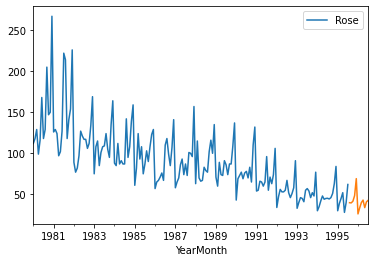

In [231]:
df.plot()
prediction.plot();

In [233]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_df = pd.DataFrame({'lower_CI':prediction- 1.96*np.std(full_data_model.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(full_data_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-7.822225,39.808796,87.439817
1995-09-01,-8.079980,39.551041,87.182062
1995-10-01,-6.017309,41.613712,89.244733
1995-11-01,0.757399,48.388420,96.019441
1995-12-01,21.510269,69.141290,116.772311


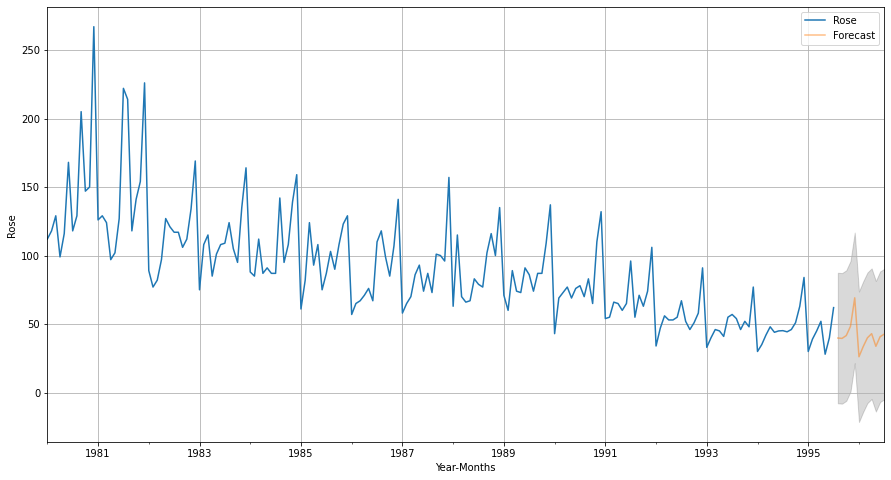

In [235]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [226]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [227]:
rmse_final = mean_squared_error(df['Rose'],full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_final)

RMSE of the Full Model 24.264960710396622
